In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df = pd.read_csv('salary_data_(cleaned).csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,Company_age (years),python,R,aws,spark,excel,Average_Revenue (million $),Average_company_size
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,...,NM,0,49,1,0,0,0,1,75.0,750
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other,...,MD,0,38,1,0,0,0,0,3500.0,10000
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,...,FL,1,12,1,0,0,1,1,300.0,750
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Other,...,WA,1,57,1,0,0,0,0,750.0,3000
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n,"New York, NY","New York, NY",51 to 200 employees,1998,Private,...,NY,1,24,1,0,0,0,1,1.0,125


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Average_Salary (K$)', 'job_state', 'same_state', 'Company_age (years)',
       'python', 'R', 'aws', 'spark', 'excel', 'Average_Revenue (million $)',
       'Average_company_size'],
      dtype='object')

In [5]:
def job_title_simplifier(job_title):
    if 'data scientist' in job_title.lower():
        return 'Data Scientist'
    elif 'data engineer' in job_title.lower():
        return 'Data Engineer'
    elif 'analyst' in job_title.lower():
        return 'Analyst'
    elif 'machine learning' in job_title.lower():
        return 'Machine Learning'
    elif 'manager' in job_title.lower():
        return 'Manager'
    elif 'director' in job_title.lower():
        return 'Director'
    else:
        return 'Other'

In [6]:
def seniority(job_title):
    if 'sr' in job_title.lower() or 'sr.' in job_title.lower() or 'senior' in job_title.lower() or 'lead' in job_title.lower() or 'principal' in job_title.lower():
        return 'Senior'
    elif 'jr' in job_title.lower() or 'jr.' in job_title.lower():
        return 'Junior'
    else:
        return 'NA'

In [7]:
df['Job_title'] = df['Job Title'].apply(job_title_simplifier)

In [8]:
df['Job_title'].value_counts()

Data Scientist      279
Other               184
Data Engineer       119
Analyst             102
Manager              22
Machine Learning     22
Director             14
Name: Job_title, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df['seniority'].value_counts()

NA        520
Senior    220
Junior      2
Name: seniority, dtype: int64

In [11]:
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip() != 'Los Angeles' else 'CA')

In [12]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
MI      6
KY      6
CT      5
IA      5
NE      4
LA      4
OR      4
NM      3
KS      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [13]:
df['No. of Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['dec_len'] = df['Job Description'].apply(lambda x: len(x))

In [15]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', ''))

In [16]:
avg = round(np.average(df['Rating']), 1)
df['Rating'] = df['Rating'].apply(lambda x: avg if x == -1 else x)

In [17]:
df.describe()

,Rating,Founded,Average_Salary (K$),same_state,Company_age (years),python,R,aws,spark,excel,Average_Revenue (million $),Average_company_size,No. of Competitors,dec_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.687062,1837.154987,101.434636,0.557951,48.456873,0.528302,0.002695,0.237197,0.225067,0.522911,2270.788410,3360.047170,1.053908,3869.545822
std,0.566205,497.183763,37.546122,0.496965,53.900445,0.499535,0.051882,0.425651,0.417908,0.499812,3727.559113,3741.993606,1.384239,1521.495868
min,1.900000,-1.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,25.000000,0.000000,407.000000
25%,3.300000,1939.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,350.000000,0.000000,2801.000000
50%,3.700000,1988.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,300.000000,750.000000,0.000000,3731.000000
75%,4.000000,2007.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,7500.000000,3.000000,4740.000000
max,5.000000,2019.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,10000.000000,4.000000,10051.000000


In [18]:
df.dtypes

Job Title                       object
Salary Estimate                 object
Job Description                 object
Rating                         float64
Company Name                    object
Location                        object
Headquarters                    object
Size                            object
Founded                          int64
Type of ownership               object
Industry                        object
Sector                          object
Revenue                         object
Competitors                     object
Average_Salary (K$)            float64
job_state                       object
same_state                       int64
Company_age (years)              int64
python                           int64
R                                int64
aws                              int64
spark                            int64
excel                            int64
Average_Revenue (million $)    float64
Average_company_size             int64
Job_title                

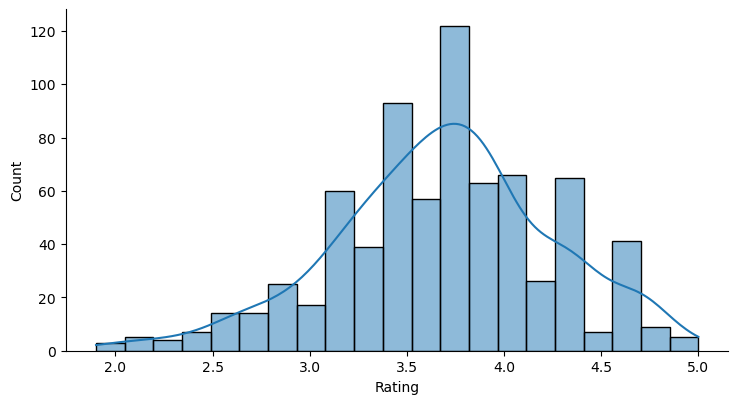

In [19]:
sns.displot(df.Rating, kde = True)
plt.gcf().set_size_inches(8,4)

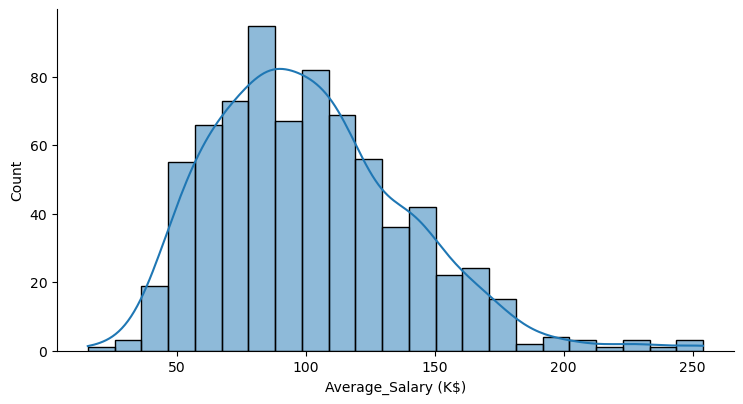

In [20]:
sns.displot(df['Average_Salary (K$)'], kde = True)
plt.gcf().set_size_inches(8,4)

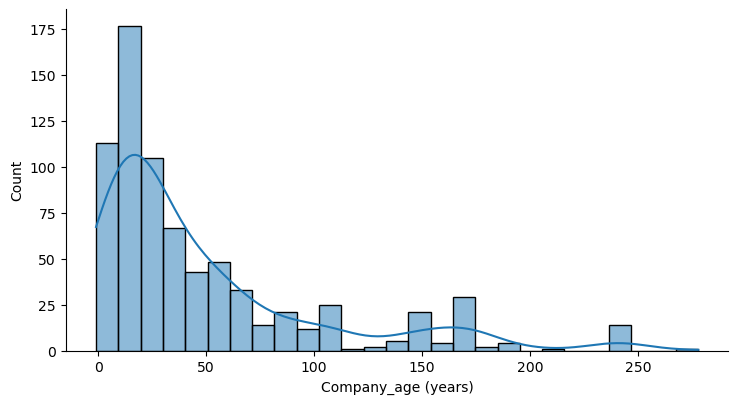

In [21]:
sns.displot(df['Company_age (years)'], kde = True)
plt.gcf().set_size_inches(8,4)

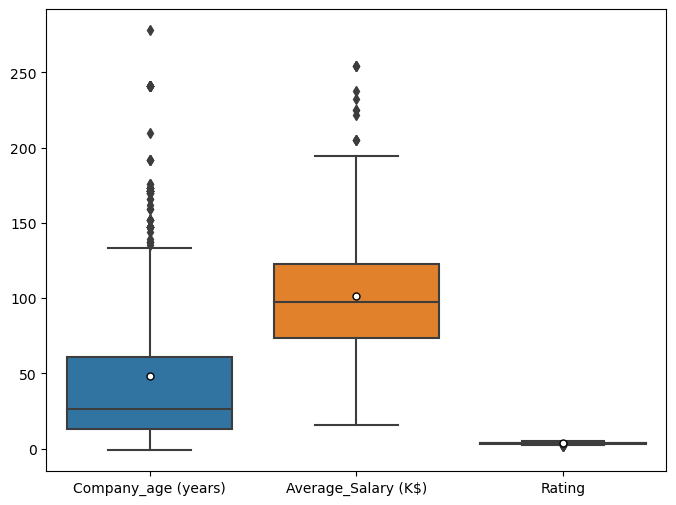

In [22]:
sns.boxplot(data = df[['Company_age (years)','Average_Salary (K$)','Rating']],
            showmeans = True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.gcf().set_size_inches(8,6)

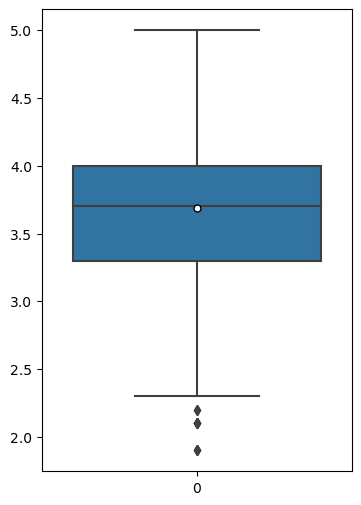

In [23]:
sns.boxplot(data = df['Rating'],
            showmeans = True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.gcf().set_size_inches(4,6)

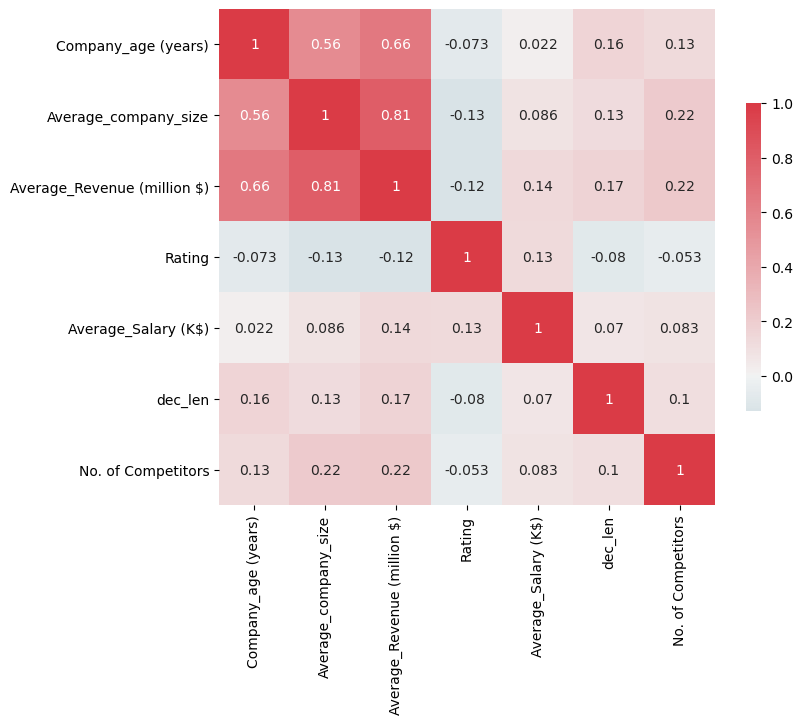

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Company_age (years)', 'Average_company_size', 'Average_Revenue (million $)', 'Rating', 'Average_Salary (K$)',
               'dec_len', 'No. of Competitors']].corr(),
            vmax = 1, center = 0, cmap = cmap, square = True, cbar_kws = {"shrink": .5}, annot = True)
plt.gcf().set_size_inches(8, 8)

In [25]:
df_num = df[['Average_Revenue (million $)', 'Rating', 'Average_Salary (K$)', 'dec_len', 'No. of Competitors']]

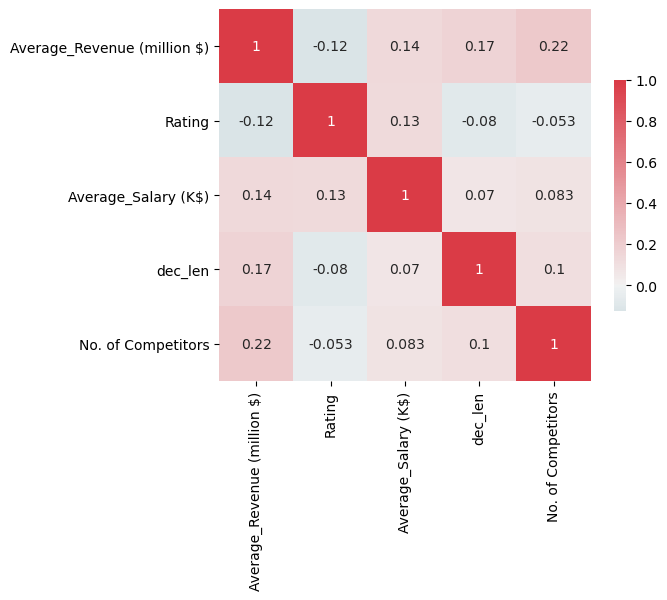

In [26]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_num.corr(),
            vmax = 1, center = 0, cmap = cmap, square = True, cbar_kws = {"shrink": .5}, annot = True)
plt.gcf().set_size_inches(6, 6)

In [27]:
df.dtypes

Job Title                       object
Salary Estimate                 object
Job Description                 object
Rating                         float64
Company Name                    object
Location                        object
Headquarters                    object
Size                            object
Founded                          int64
Type of ownership               object
Industry                        object
Sector                          object
Revenue                         object
Competitors                     object
Average_Salary (K$)            float64
job_state                       object
same_state                       int64
Company_age (years)              int64
python                           int64
R                                int64
aws                              int64
spark                            int64
excel                            int64
Average_Revenue (million $)    float64
Average_company_size             int64
Job_title                

In [28]:
df_cat = df[['Job_title', 'job_state', 'python', 'R', 'aws', 'spark', 'excel', 'seniority', 'Company Name', 'Location', 'Headquarters',
             'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue']]

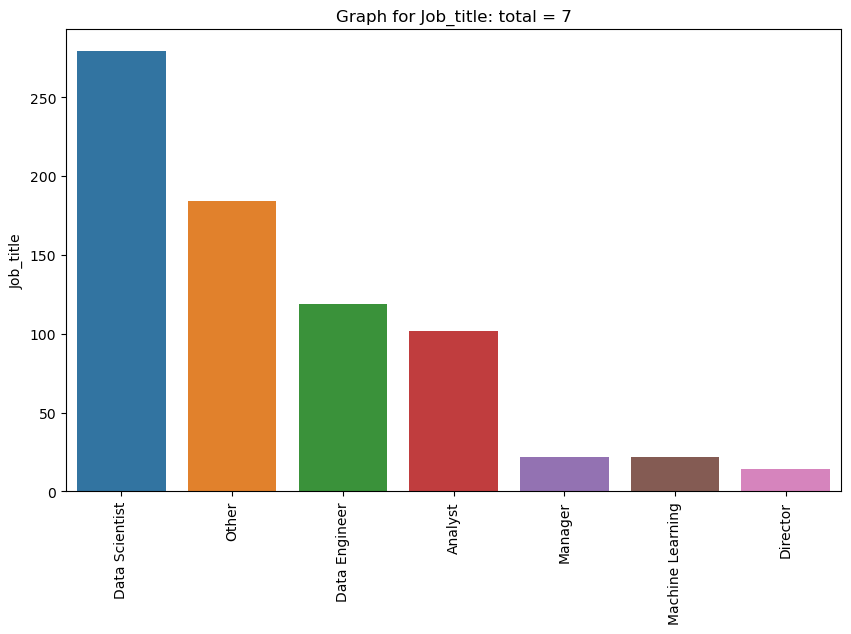

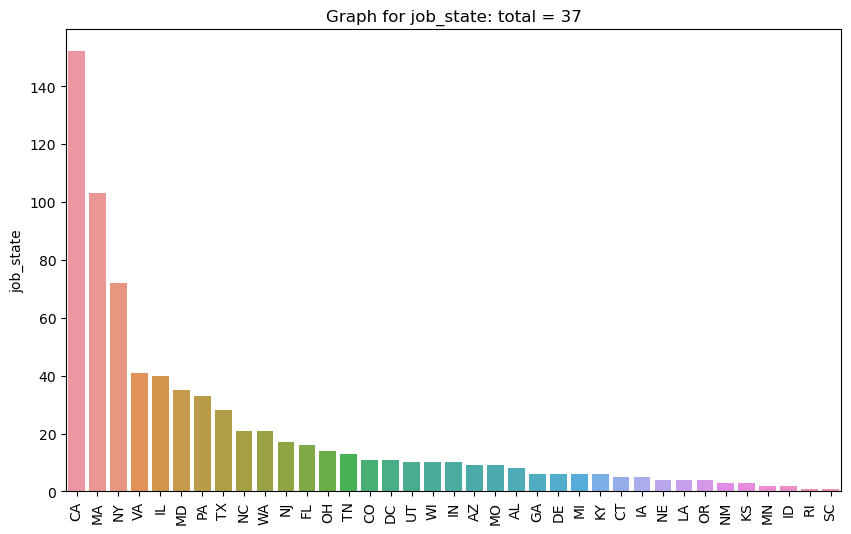

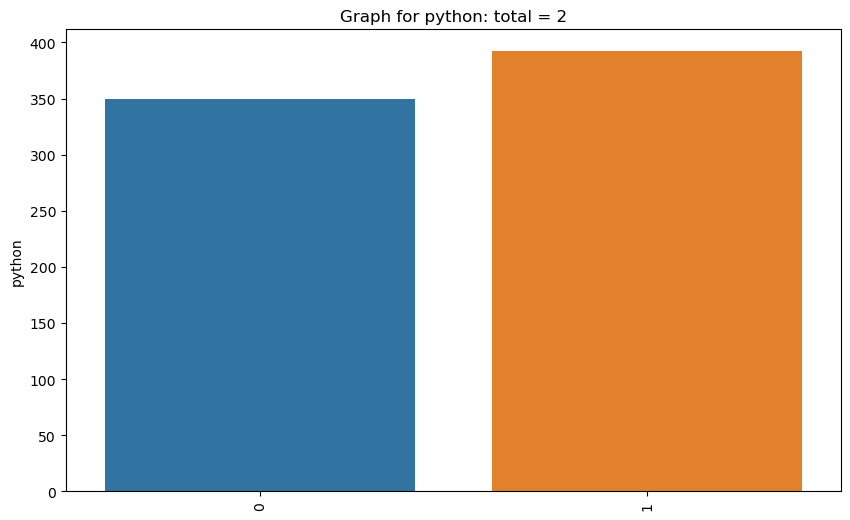

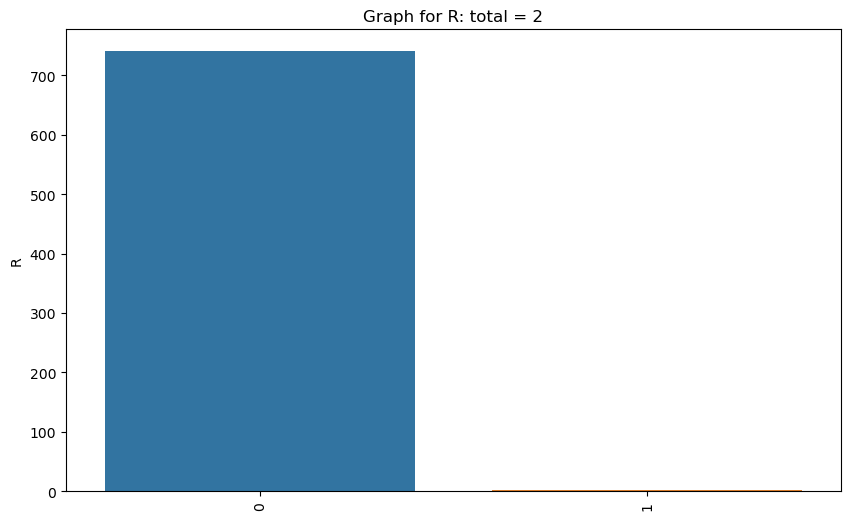

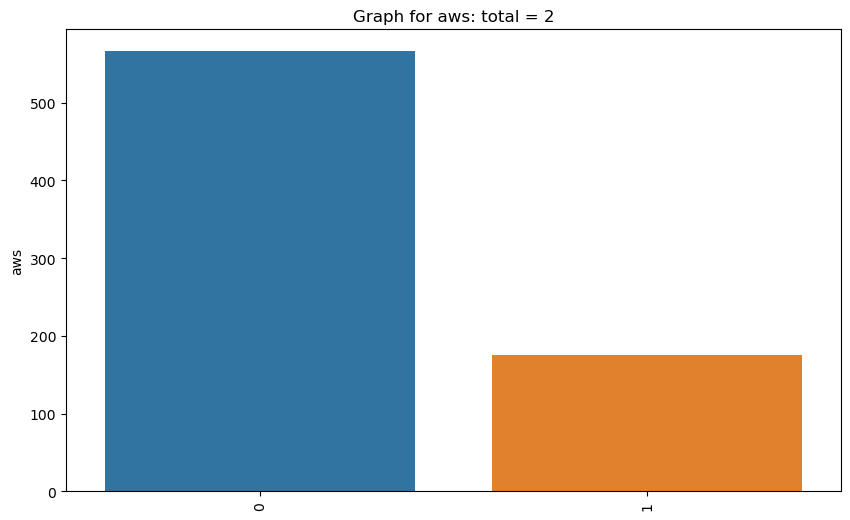

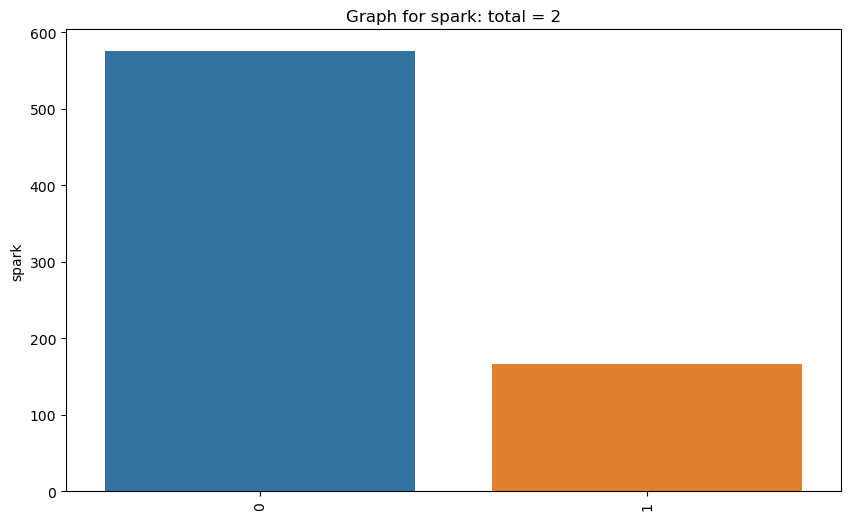

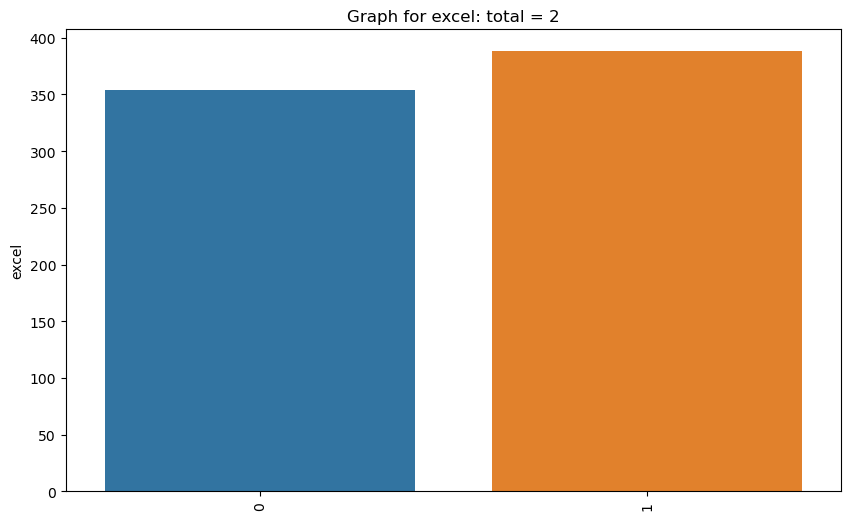

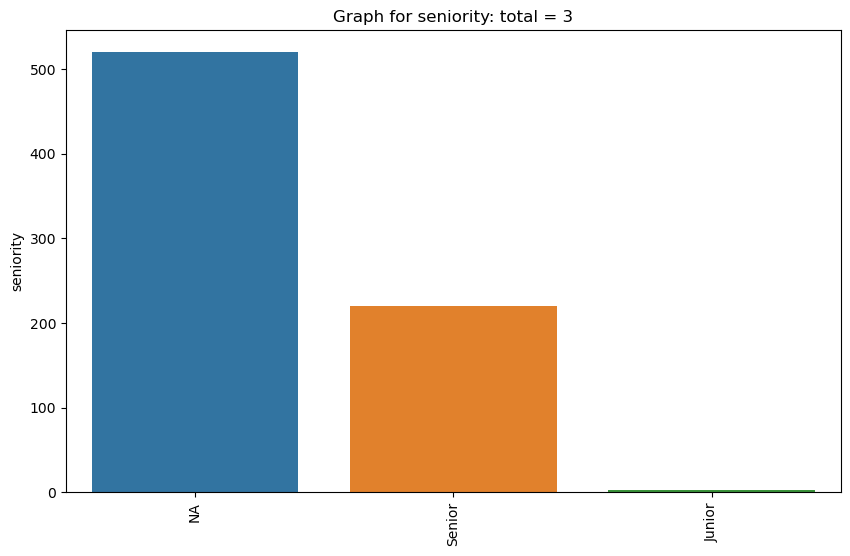

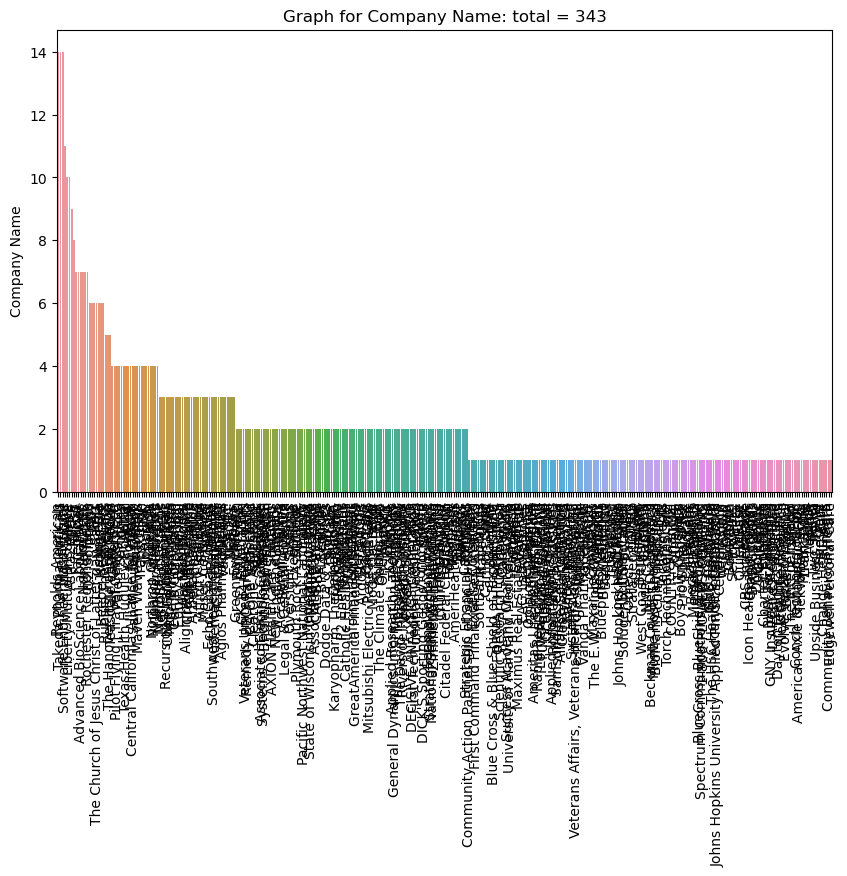

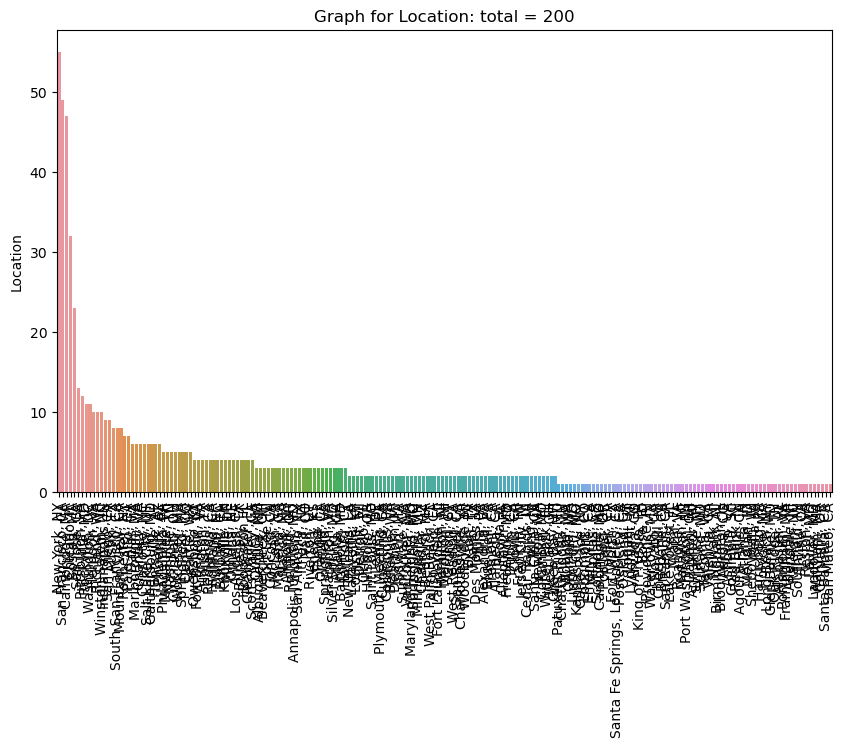

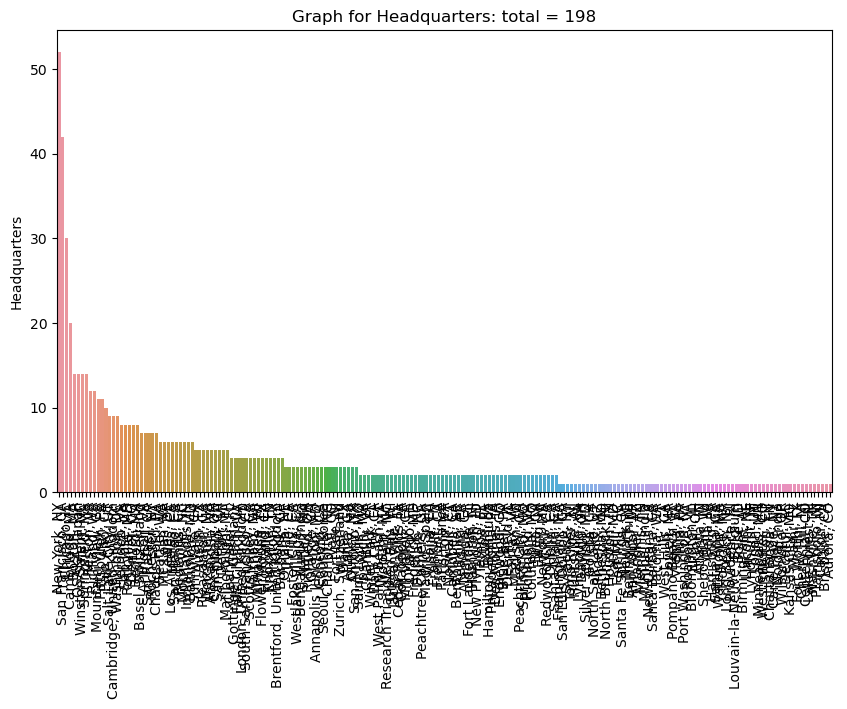

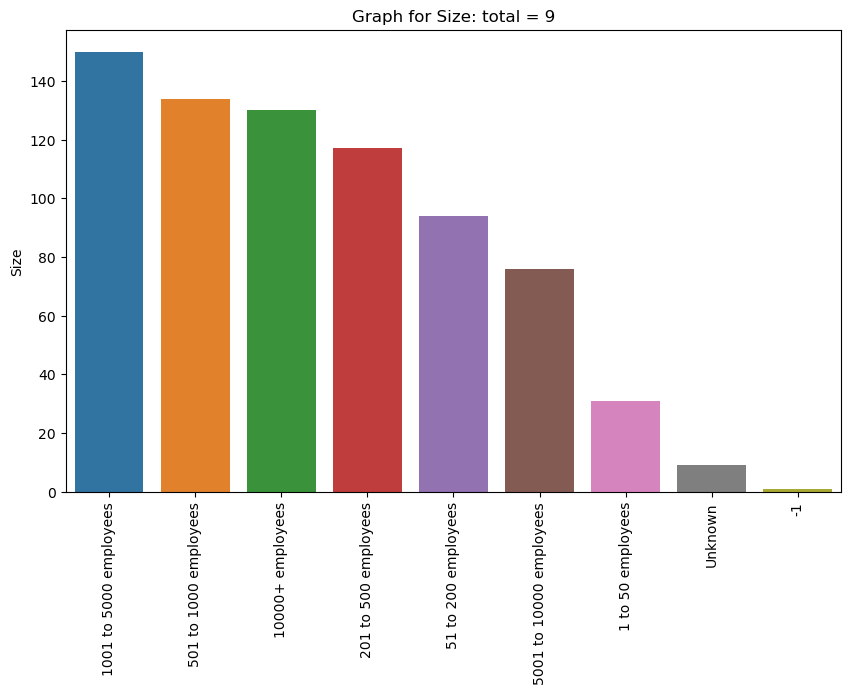

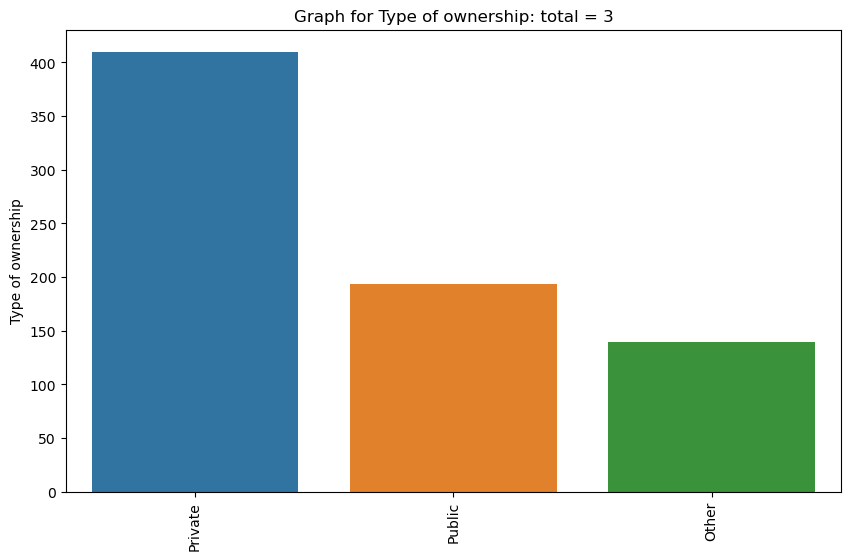

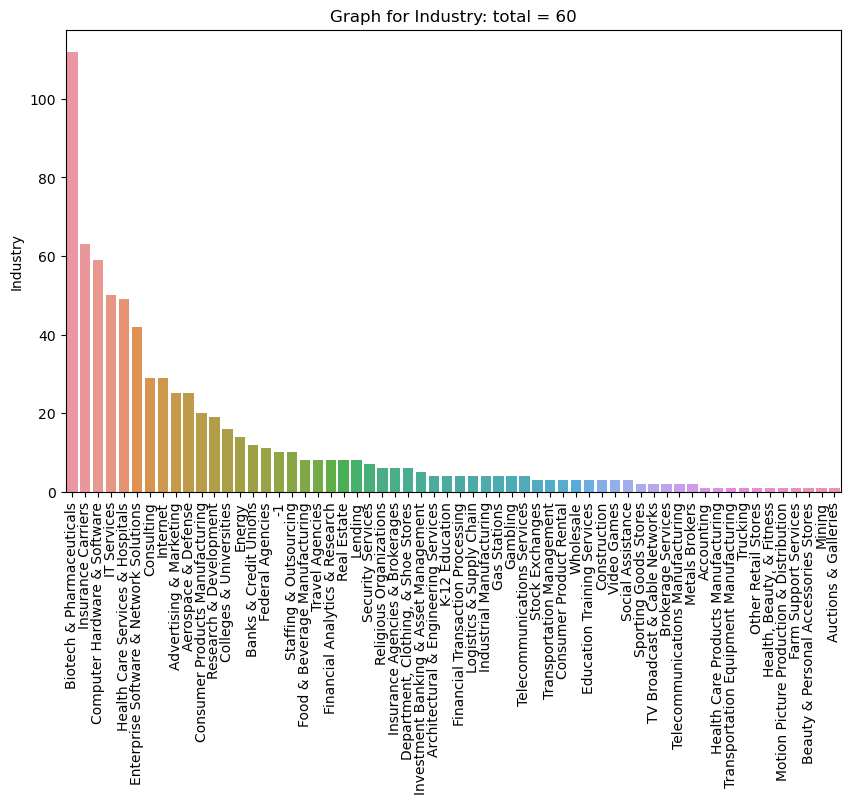

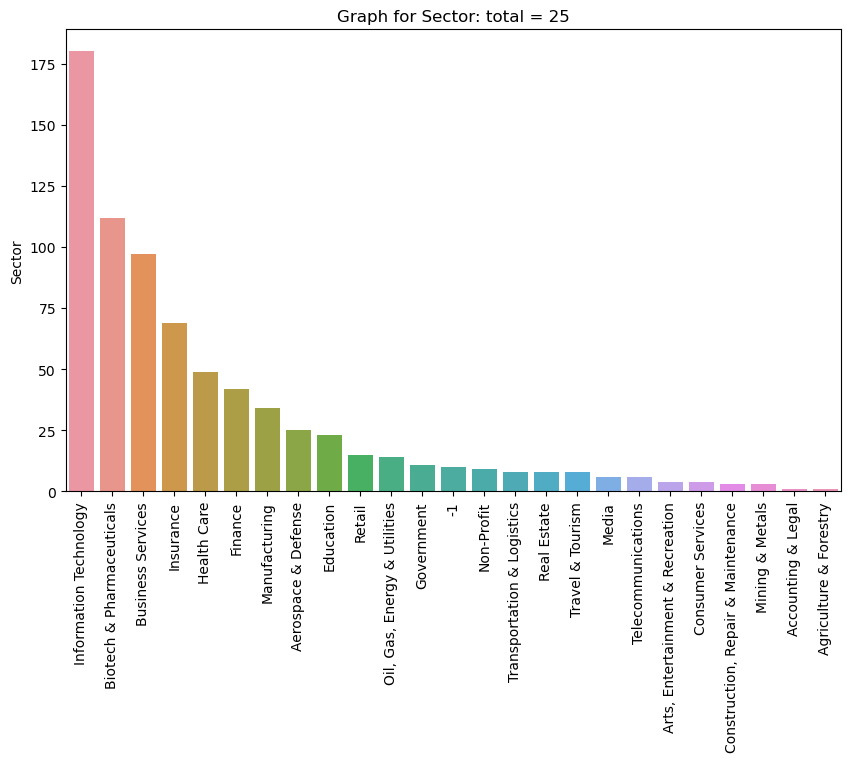

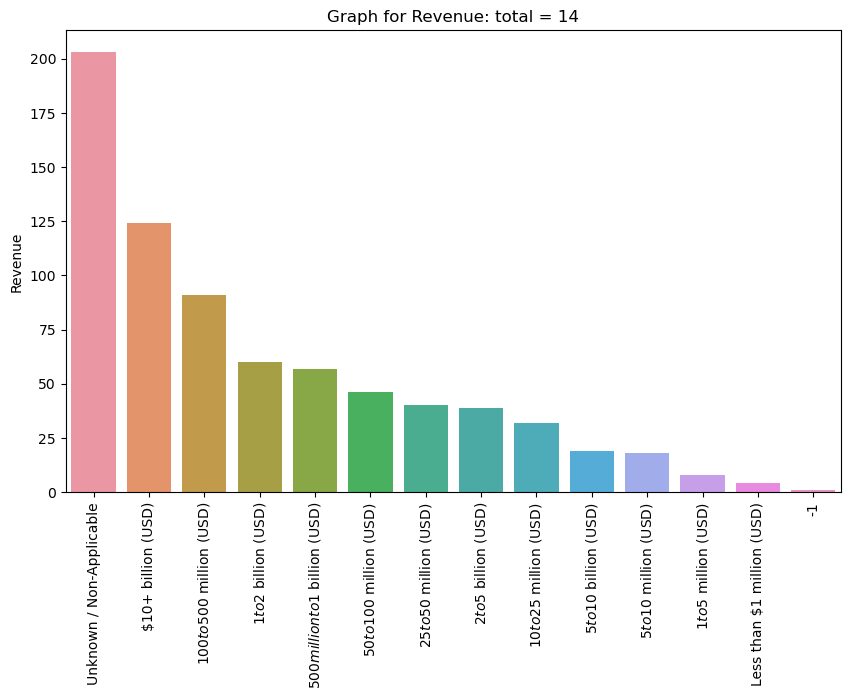

In [29]:
for i in df_cat:
    cat_num = df_cat[i].value_counts()
    c = sns.barplot(x = cat_num.index, y = cat_num)
    c.set_xticklabels(c.get_xticklabels(), rotation=90)
    plt.title("Graph for %s: total = %d" % (i, len(cat_num)))
    plt.show()

In [30]:
pd.pivot_table(df, index = ['Job_title', 'seniority'], values = 'Average_Salary (K$)').sort_values('Job_title', ascending = True)

Average_Salary (K$)
Job_title        seniority                     
Analyst          Junior               56.500000
                 NA                   61.155405
                 Senior               80.092593
Data Engineer    NA                   96.701220
                 Senior              124.689189
Data Scientist   Junior              106.500000
                 NA                  107.043011
                 Senior              138.956522
Director         NA                  168.607143
Machine Learning NA                  119.133333
                 Senior              142.071429
Manager          NA                   84.022727
Other            NA                   78.500000
                 Senior              109.061404

In [31]:
pd.pivot_table(df, index = ['Job_title', 'seniority', 'job_state'], values = 'Average_Salary (K$)').sort_values('Job_title', ascending = True)

Average_Salary (K$)
Job_title seniority job_state                     
Analyst   Junior    PA                   56.500000
          Senior    VA                   72.333333
                    TN                   27.000000
                    RI                  100.000000
                    PA                   69.500000
...                                            ...
Other     NA        MA                   90.300000
                    MD                   87.857143
                    MO                   72.333333
                    IL                   57.166667
          Senior    VA                   77.500000

[161 rows x 1 columns]

In [32]:
pd.options.display.max_rows

60

In [33]:
pd.set_option('display.max_rows', None)

In [34]:
pvt_table = pd.pivot_table(df, index = ['Job_title', 'seniority', 'job_state'], values = 'Average_Salary (K$)').sort_values('Job_title', ascending = True)

In [35]:
pvt_table

Average_Salary (K$)
Job_title        seniority job_state                     
Analyst          Junior    PA                   56.500000
                 Senior    VA                   72.333333
                           TN                   27.000000
                           RI                  100.000000
                           PA                   69.500000
                           NY                   70.400000
                           NJ                  109.333333
                           MD                  107.500000
                           MA                   81.000000
                           FL                   61.000000
                           AZ                   55.000000
                 NA        WI                   58.833333
                           WA                   54.500000
                           VA                   70.833333
                           UT                   54.750000
                           PA                   49.000000
                 Senior    CA                  132.833333
                 NA        NY                   62.944444
                           OH                   53.875000
                           CA                   75.733333
                           CO                   29.500000
                           DC                   63.500000
                           FL                   40.750000
                           IA                   43.000000
                           ID                   56.250000
                           AL                   62.200000
                           LA                   48.000000
                           MA                   51.833333
                           MD                   67.250000
                           MN                   76.000000
                           MO                   61.000000
                           NJ                   57.833333
                           IL                   66.500000
Data Engineer    NA        TN                   97.250000
                           TX                  104.583333
                           UT                  100.333333
                           VA                   96.888889
                 Senior    AZ                  100.000000
                           CA                  149.576923
                           NC                  119.666667
                           IL                  107.500000
                           IN                  122.500000
                           TN                  101.875000
                           TX                  138.500000
                           VA                   97.000000
                 NA        PA                   91.500000
                 Senior    IA                  115.500000
                 NA        OR                   73.000000
                           LA                   70.500000
                           NJ                  112.000000
                           NY                   86.375000
                           AL                   65.000000
                           AZ                   65.833333
                           CO                   99.000000
                           DC                   85.000000
                           FL                   91.833333
                           IA                   77.500000
                           CA                  107.833333
                           IN                   90.500000
                           MA                  107.291667
                           MD                  109.000000
                           MN                   95.000000
                           NC                   88.833333
                           IL                   89.300000
Data Scientist   NA        WA                   77.944444
                 Senior    MD                  140.125000
                 NA        WI                  120.000000
                 Senior    CA       

In [36]:
job_and_salary = pd.pivot_table(df, index = ['Job_title'], values = 'Average_Salary (K$)').sort_values('Job_title', ascending = True)
job_and_salary

,Average_Salary (K$)
Job_title,
Analyst,66.122549
Data Engineer,105.403361
Data Scientist,117.564516
Director,168.607143
Machine Learning,126.431818
Manager,84.022727
Other,87.967391


In [37]:
df_pivots = df[['Job_title', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'No. of Competitors',
                'python', 'R', 'aws', 'spark', 'excel']]

                  Average_Salary (K$)
Job_title                            
Analyst                     66.122549
Data Engineer              105.403361
Data Scientist             117.564516
Director                   168.607143
Machine Learning           126.431818
Manager                     84.022727
Other                       87.967391


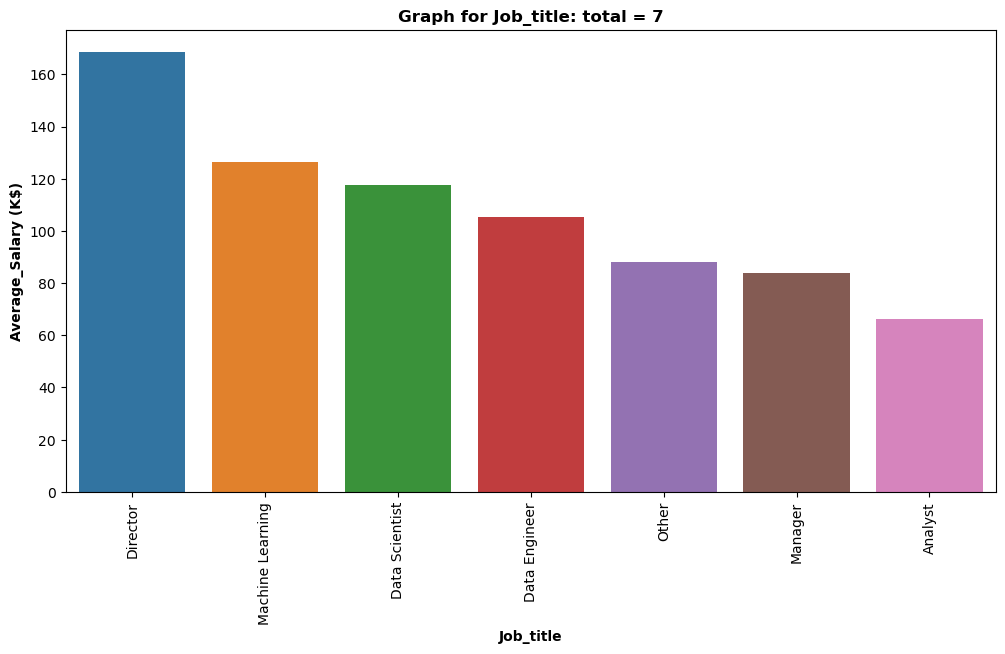

        Average_Salary (K$)
Rating                     
1.9               87.500000
2.1               95.900000
2.2               97.750000
2.3               81.500000
2.4               60.214286
2.5              120.000000
2.6              109.083333
2.7               85.178571
2.8               83.928571
2.9               81.138889
3.0               85.588235
3.1               86.580000
3.2              106.928571
3.3              103.897436
3.4               93.465909
3.5              104.897959
3.6               98.868421
3.7              105.680328
3.8               97.418033
3.9              113.071429
4.0              107.170213
4.1              116.368421
4.2              100.442308
4.3              102.468750
4.4              108.606061
4.5              117.714286
4.6               97.250000
4.7              103.983871
4.8               80.277778
5.0              134.700000


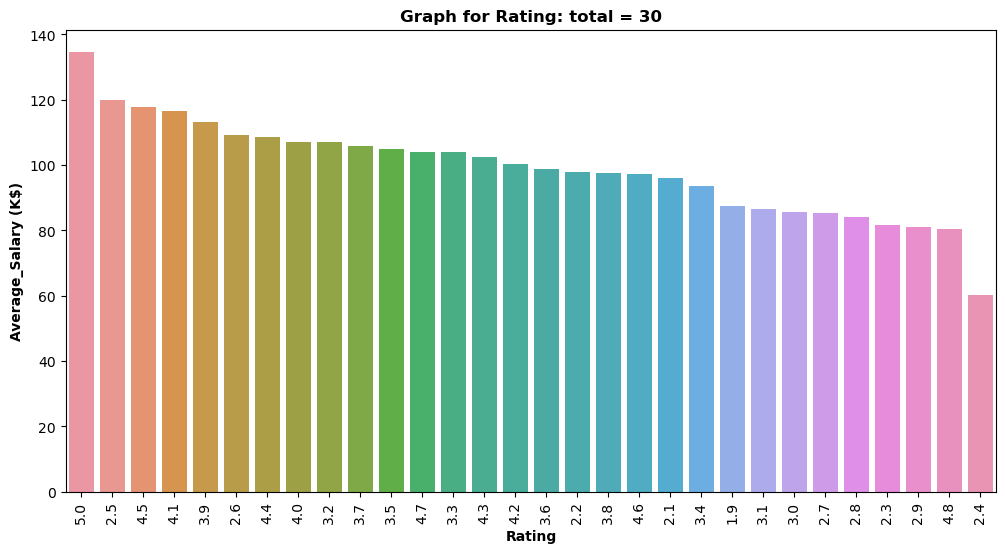

                         Average_Salary (K$)
Size                                        
-1                                117.500000
1 to 50 employees                 104.870968
10000+ employees                  112.769231
1001 to 5000 employees             94.590000
201 to 500 employees              100.247863
5001 to 10000 employees            97.447368
501 to 1000 employees              91.458955
51 to 200 employees               111.744681
Unknown                           128.111111


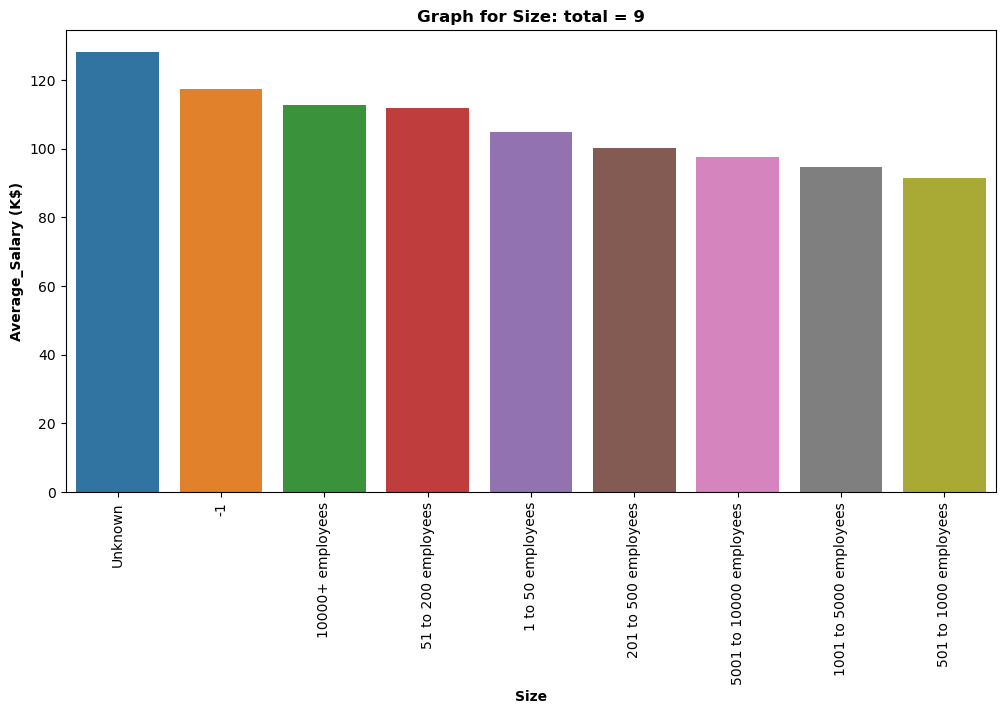

                   Average_Salary (K$)
Type of ownership                     
Other                        86.258993
Private                     102.060976
Public                      111.033679


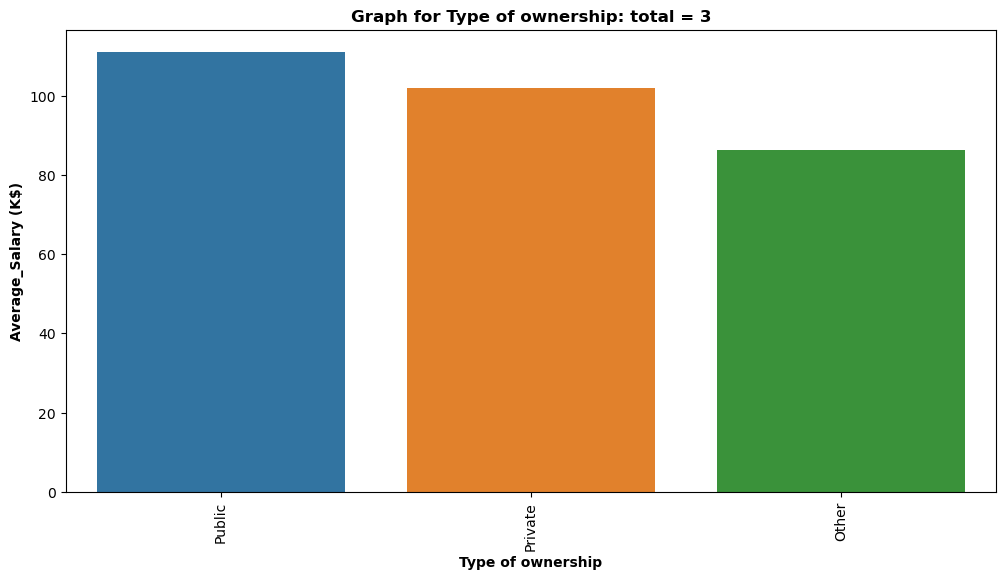

                                          Average_Salary (K$)
Industry                                                     
-1                                                 114.650000
Accounting                                         113.500000
Advertising & Marketing                            104.300000
Aerospace & Defense                                 99.060000
Architectural & Engineering Services                50.500000
Auctions & Galleries                               128.000000
Banks & Credit Unions                               70.625000
Beauty & Personal Accessories Stores                85.500000
Biotech & Pharmaceuticals                          112.098214
Brokerage Services                                 129.000000
Colleges & Universities                            102.687500
Computer Hardware & Software                       115.194915
Construction                                        53.000000
Consulting                                         108.689655
Consumer

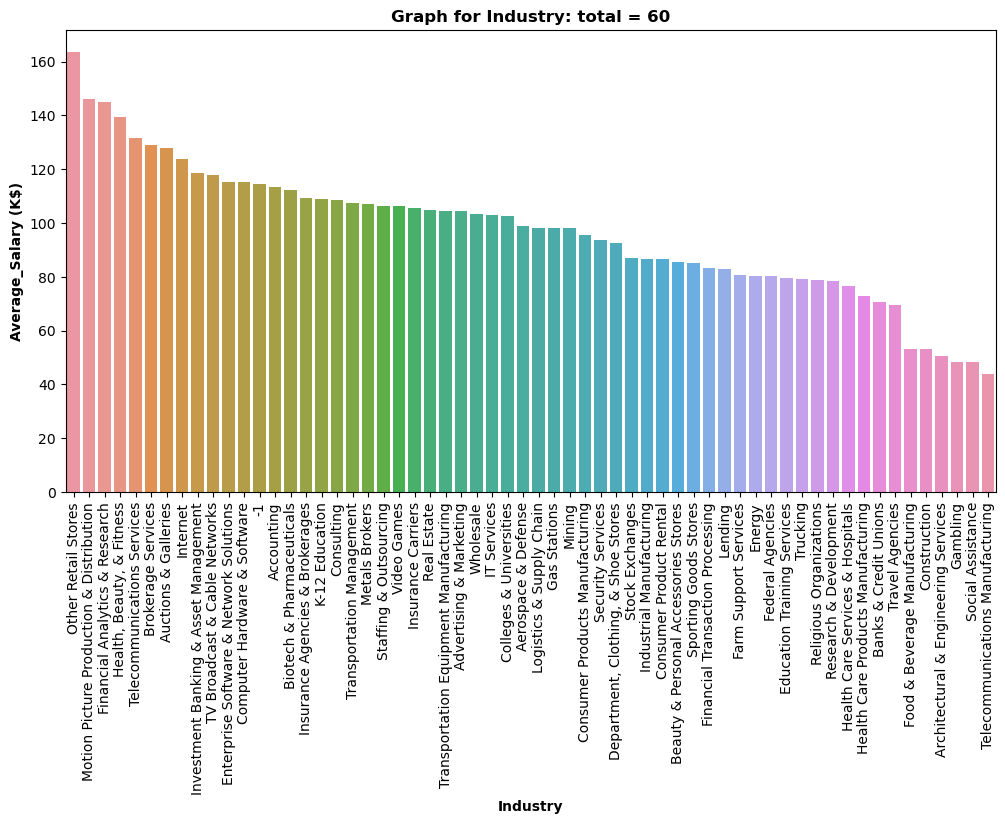

                                    Average_Salary (K$)
Sector                                                 
-1                                           114.650000
Accounting & Legal                           113.500000
Aerospace & Defense                           99.060000
Agriculture & Forestry                        80.500000
Arts, Entertainment & Recreation              48.500000
Biotech & Pharmaceuticals                    112.098214
Business Services                             97.701031
Construction, Repair & Maintenance            53.000000
Consumer Services                             99.875000
Education                                    100.739130
Finance                                       98.011905
Government                                    80.363636
Health Care                                   76.530612
Information Technology                       113.191667
Insurance                                    105.942029
Manufacturing                                 84

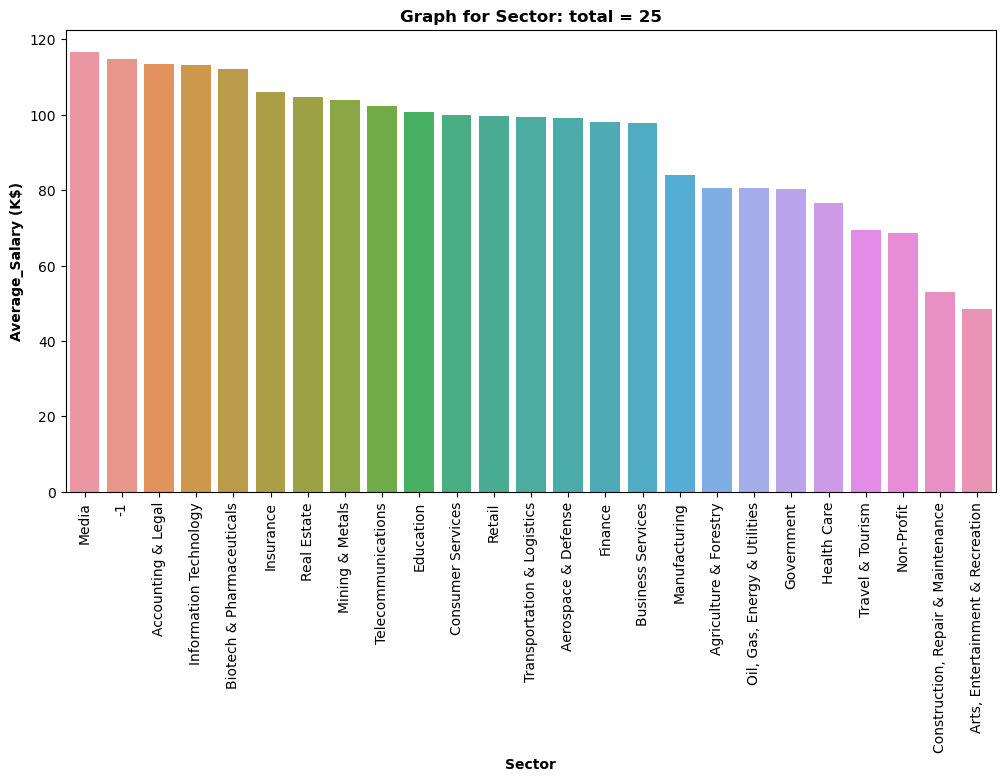

                                  Average_Salary (K$)
Revenue                                              
$1 to $2 billion (USD)                     104.533333
$1 to $5 million (USD)                     119.312500
$10 to $25 million (USD)                   101.515625
$10+ billion (USD)                         115.568548
$100 to $500 million (USD)                  86.005495
$2 to $5 billion (USD)                      95.423077
$25 to $50 million (USD)                    82.837500
$5 to $10 billion (USD)                     94.184211
$5 to $10 million (USD)                    126.111111
$50 to $100 million (USD)                  102.434783
$500 million to $1 billion (USD)            86.991228
-1                                         117.500000
Less than $1 million (USD)                 108.625000
Unknown / Non-Applicable                   105.002463


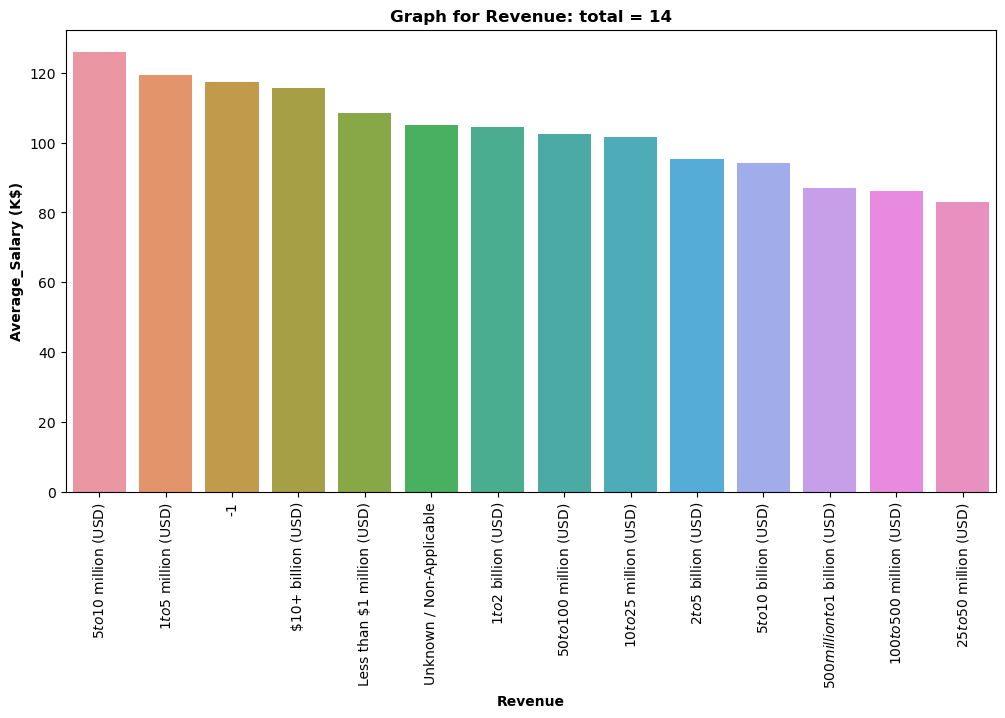

                    Average_Salary (K$)
No. of Competitors                     
0                             98.797826
1                            106.208333
2                            108.085366
3                            105.504386
4                             56.500000


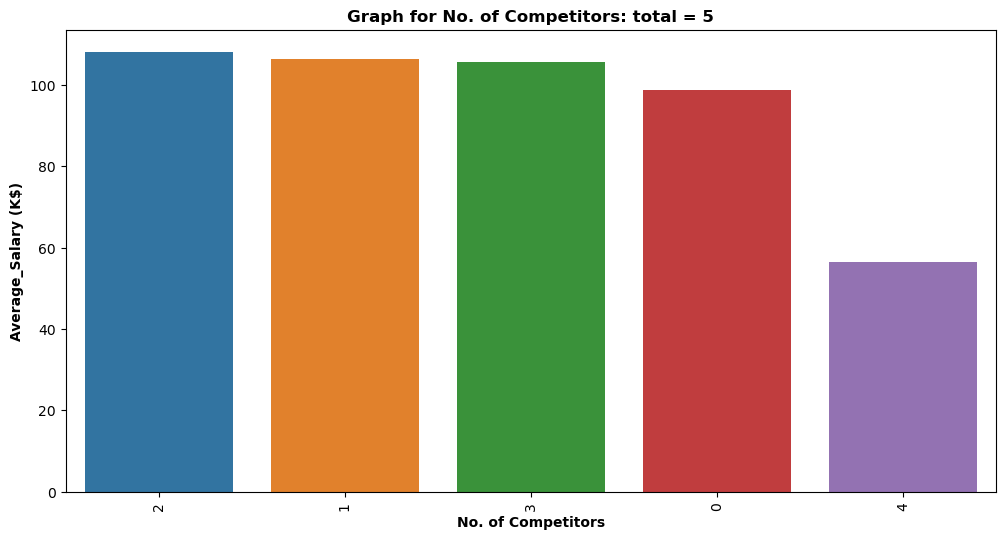

        Average_Salary (K$)
python                     
0                 88.870000
1                112.653061


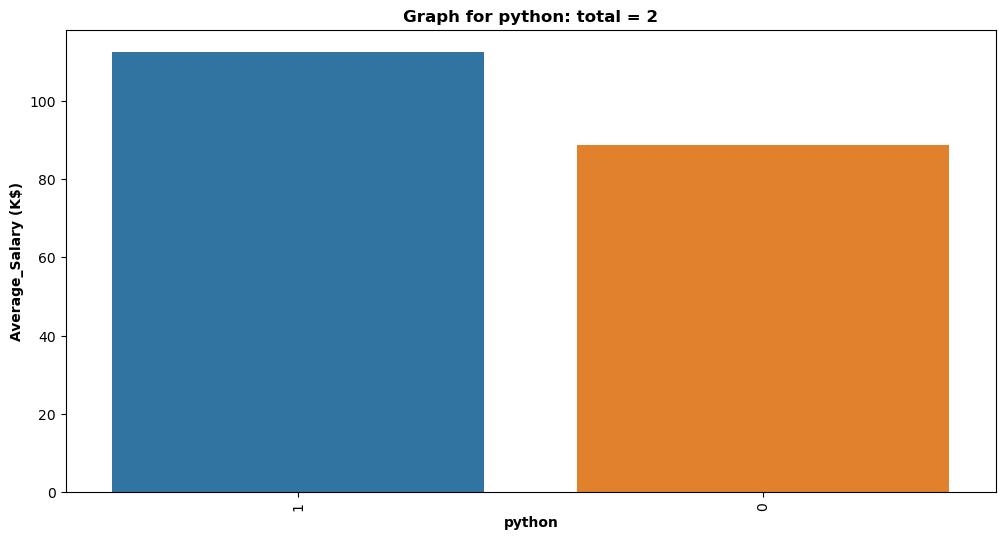

   Average_Salary (K$)
R                     
0           101.517568
1            70.750000


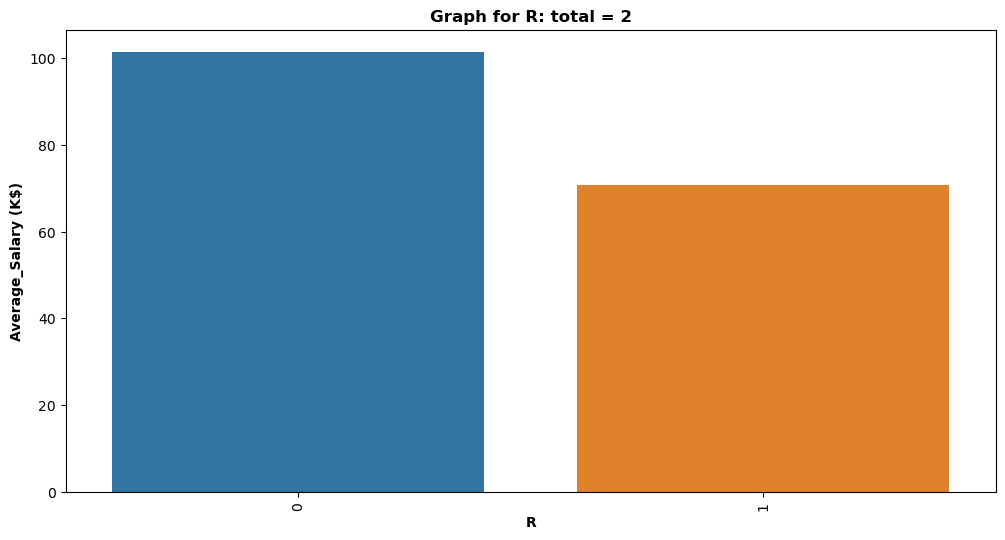

     Average_Salary (K$)
aws                     
0              97.823322
1             113.048295


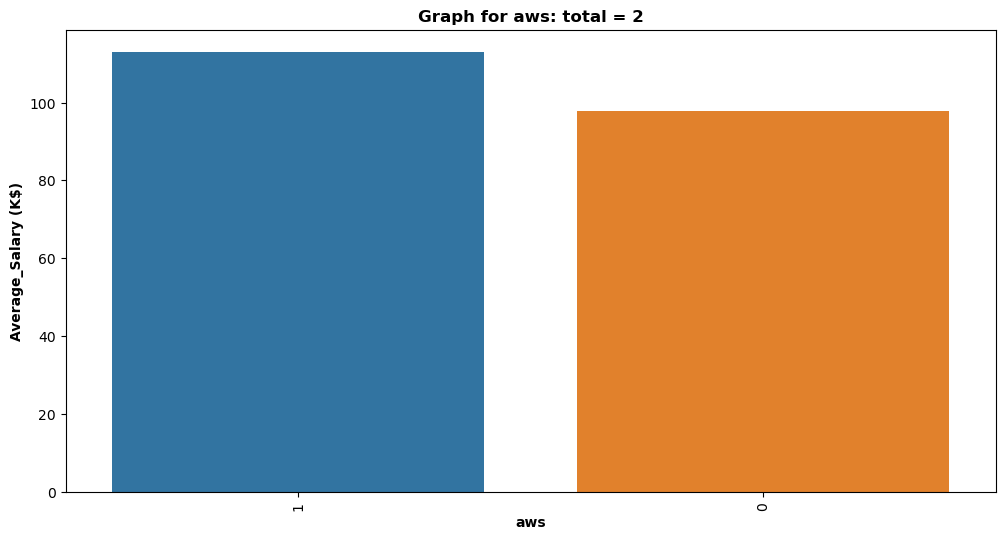

       Average_Salary (K$)
spark                     
0                97.974783
1               113.347305


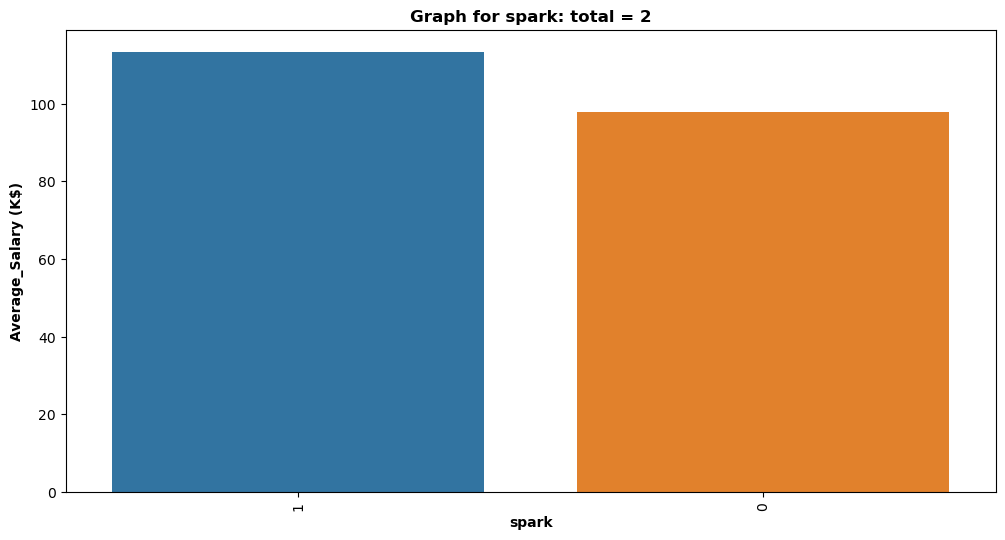

       Average_Salary (K$)
excel                     
0               104.242938
1                98.872423


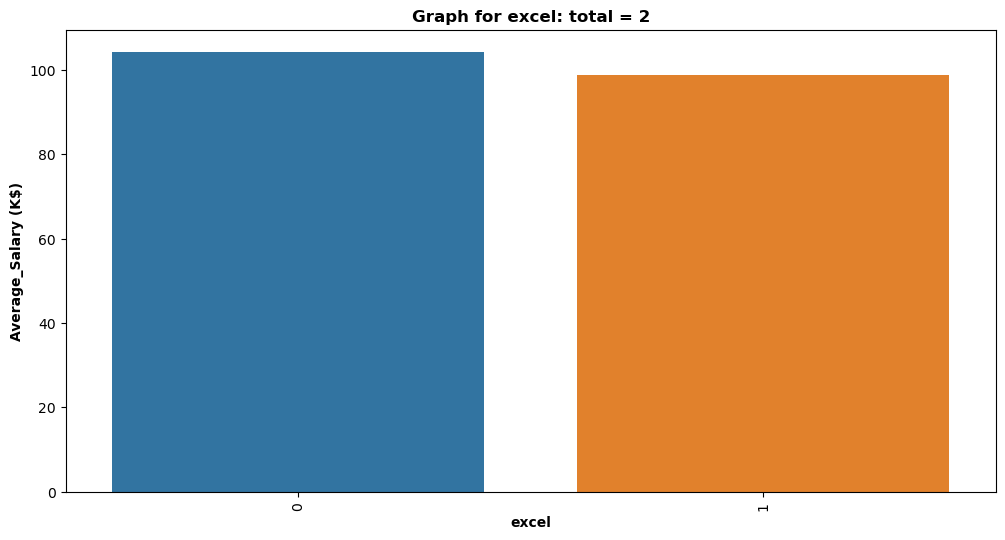

In [38]:
for i in df_pivots.columns:
    pvt_table = pd.pivot_table(df, index = [i], values = 'Average_Salary (K$)').sort_values(i, ascending = True)
    
    print(pvt_table)
    
    ax = sns.barplot(x = pvt_table.index, y = pvt_table['Average_Salary (K$)'], 
                 order = pvt_table.sort_values('Average_Salary (K$)', ascending = False).index)

    ax.tick_params(axis = 'x', labelrotation = 90)
    ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
    ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})

    plt.title("Graph for %s: total = %d" % (i, len(pvt_table)), weight = 'bold')
    plt.gcf().set_size_inches(12,6)
    plt.show()